In [15]:
import nltk
#nltk.download()
from nltk.corpus import wordnet as wn
import numpy as np
import matplotlib.pyplot as plt

### WordNet:
A large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.

In [3]:
dose = wn.synset('dose.n.01')
hyper = lambda s : s.hypernyms()
list(dose.closure(hyper))

[Synset('medicine.n.02'),
 Synset('drug.n.01'),
 Synset('agent.n.03'),
 Synset('causal_agent.n.01'),
 Synset('substance.n.07'),
 Synset('physical_entity.n.01'),
 Synset('matter.n.03'),
 Synset('entity.n.01')]

### Simple SVD Word Vectors

In [6]:
la = np.linalg
words = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]
X = np.array([[0, 2, 1, 0, 0, 0, 0, 0],
              [2, 0, 0, 1, 0, 1, 0, 0],
              [1, 0, 0, 0, 0, 0, 1, 0],
              [0, 1, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 1],
              [0, 1, 0, 0, 0, 0, 0, 1],
              [0, 0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 1, 1, 0]])
U, s, Vh = la.svd(X, full_matrices = False)

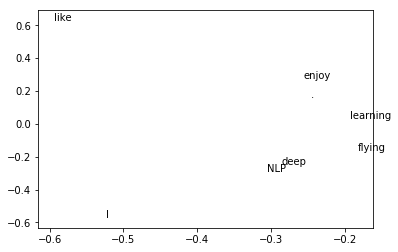

In [29]:
for i in range(len(words)):
    plt.plot(U[i,0], U[i,1], 'k')
    plt.text(U[i,0], U[i,1], words[i])
plt.show()

### Problems With SVD
1. Computational cost scales up quadratically for n x m matrix

 -> Bad for millions of words or documents
2. Hard to add new words/docs
3. Diff learning regime than other DL models

### Main idea of word2vec

Predict n words to left and n words to right

Good thing: easy to add new words/sentences/docs

Objective function: 
\begin{equation*}
J(\theta)   = \frac{1}{T} \sum_{t=1}^{T} \sum_{-m \leq j\leq m, j \neq 0} \log p(w_{t+j}|w_t)
\end{equation*}

Explanation:
From a very large corpus of T tokens, and take each word ($w_t$ = center word). Take m words to the left and the right, maximize the log prob of these words given the center word. 

$\theta$ : all word vectors that are being jointly optimized.
